In [4]:
import requests
def get_temp_data(dt = '2022-02-14'):
    url = f"https://api.data.gov.sg/v1/environment/air-temperature?date={dt}"
    resp = requests.get(url)
    return resp.json()

In [19]:
import pandas as pd
from typing import Dict
def choose_station(temp_data: Dict, station_id: str):
    output = []
    for item in temp_data['items']:
        ts = item['timestamp']
        temperature = None
        try:
            temperature = [temp['value'] for temp in item['readings'] if temp['station_id']==station_id][0]
        except IndexError:
            pass
        output.append({
            'time': ts,
            'temp': temperature,
        })
    return pd.DataFrame(output)

<AxesSubplot:xlabel='time'>

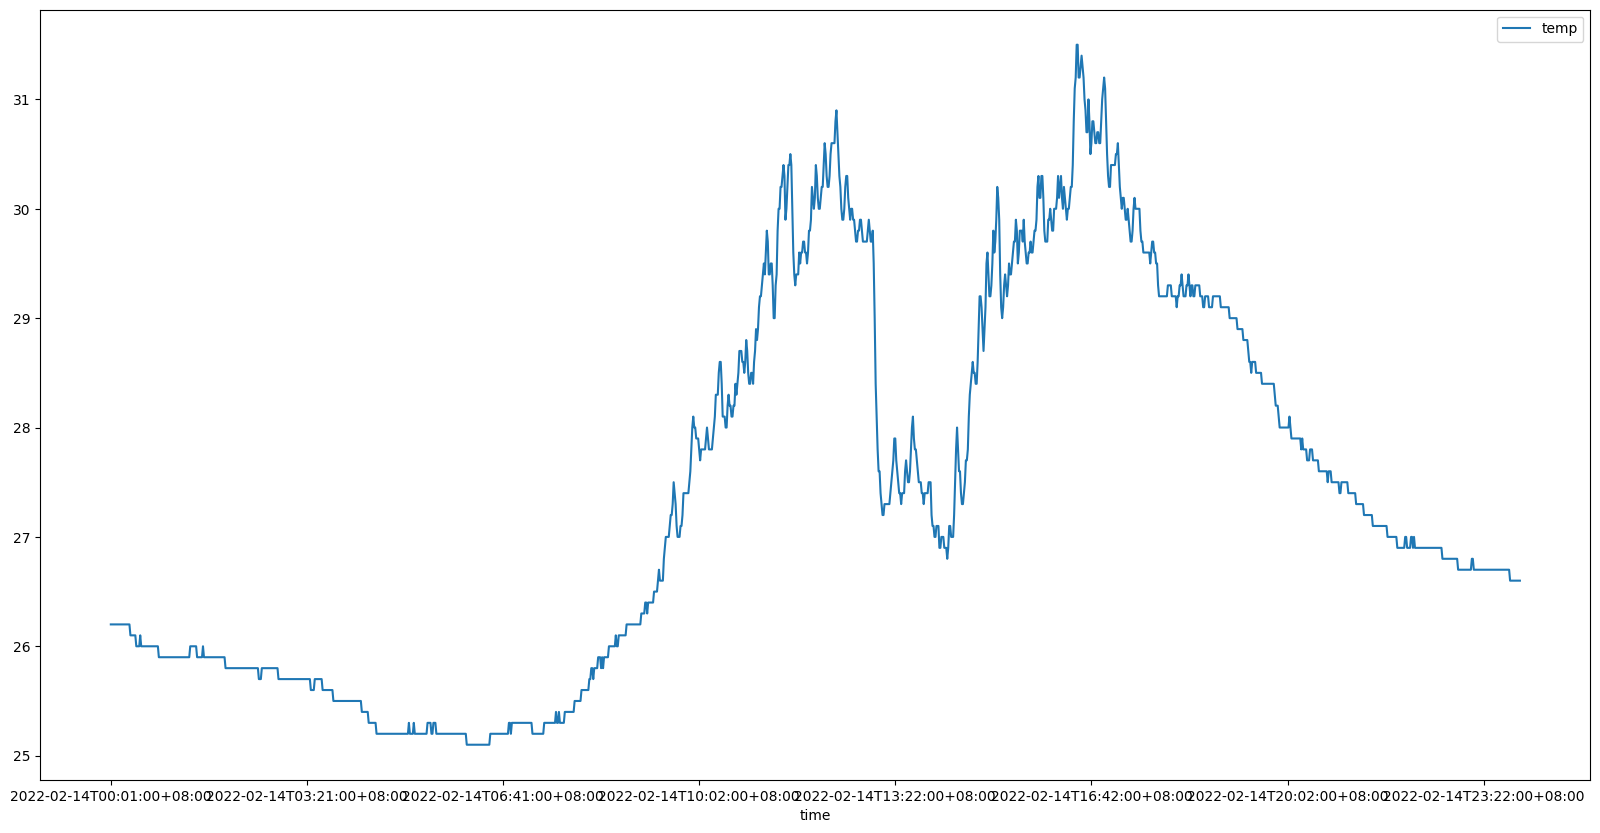

In [10]:
pd.DataFrame(output).plot(x='time', figsize = (20,10))

In [1]:
catalog.list()

['temp_plot',
 'raw_temp',
 'station_temperature',
 'parameters',
 'params:station_id']

In [12]:
catalog.load("raw_temp")

[04/11/23 11:33:59] INFO     Loading data from 'raw_temp' (JSONDataSet)...                      ]8;id=985173;file:///Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=198613;file:///Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

{'metadata': {'stations': [{'id': 'S109',
    'device_id': 'S109',
    'name': 'Ang Mo Kio Avenue 5',
    'location': {'latitude': 1.3764, 'longitude': 103.8492}},
   {'id': 'S50',
    'device_id': 'S50',
    'name': 'Clementi Road',
    'location': {'latitude': 1.3337, 'longitude': 103.7768}},
   {'id': 'S107',
    'device_id': 'S107',
    'name': 'East Coast Parkway',
    'location': {'latitude': 1.3135, 'longitude': 103.9625}},
   {'id': 'S43',
    'device_id': 'S43',
    'name': 'Kim Chuan Road',
    'location': {'latitude': 1.3399, 'longitude': 103.8878}},
   {'id': 'S108',
    'device_id': 'S108',
    'name': 'Marina Gardens Drive',
    'location': {'latitude': 1.2799, 'longitude': 103.8703}},
   {'id': 'S44',
    'device_id': 'S44',
    'name': 'Nanyang Avenue',
    'location': {'latitude': 1.34583, 'longitude': 103.68166}},
   {'id': 'S121',
    'device_id': 'S121',
    'name': 'Old Choa Chu Kang Road',
    'location': {'latitude': 1.37288, 'longitude': 103.72244}},
   {'id': '

In [11]:
df = catalog.load("station_temperature")
df

[04/11/23 11:33:47] INFO     Loading data from 'station_temperature' (CSVDataSet)...            ]8;id=460267;file:///Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=935239;file:///Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/io/data_catalog.py#343\343]8;;\

,time,temp
0,2022-02-14T00:01:00+08:00,26.2
1,2022-02-14T00:02:00+08:00,26.2
2,2022-02-14T00:03:00+08:00,26.2
3,2022-02-14T00:04:00+08:00,26.2
4,2022-02-14T00:05:00+08:00,26.2
...,...,...
1433,2022-02-14T23:55:00+08:00,26.6
1434,2022-02-14T23:56:00+08:00,26.6
1435,2022-02-14T23:57:00+08:00,26.6
1436,2022-02-14T23:58:00+08:00,26.6


In [3]:
#average temperature by an hour

In [9]:
def avg_temp_by_hour(df):
    df['hour'] = df['time'].apply(lambda x: x[:13])
    return df.groupby(['hour']).mean().plot(figsize = (20,12)).figure

<AxesSubplot:xlabel='hour'>

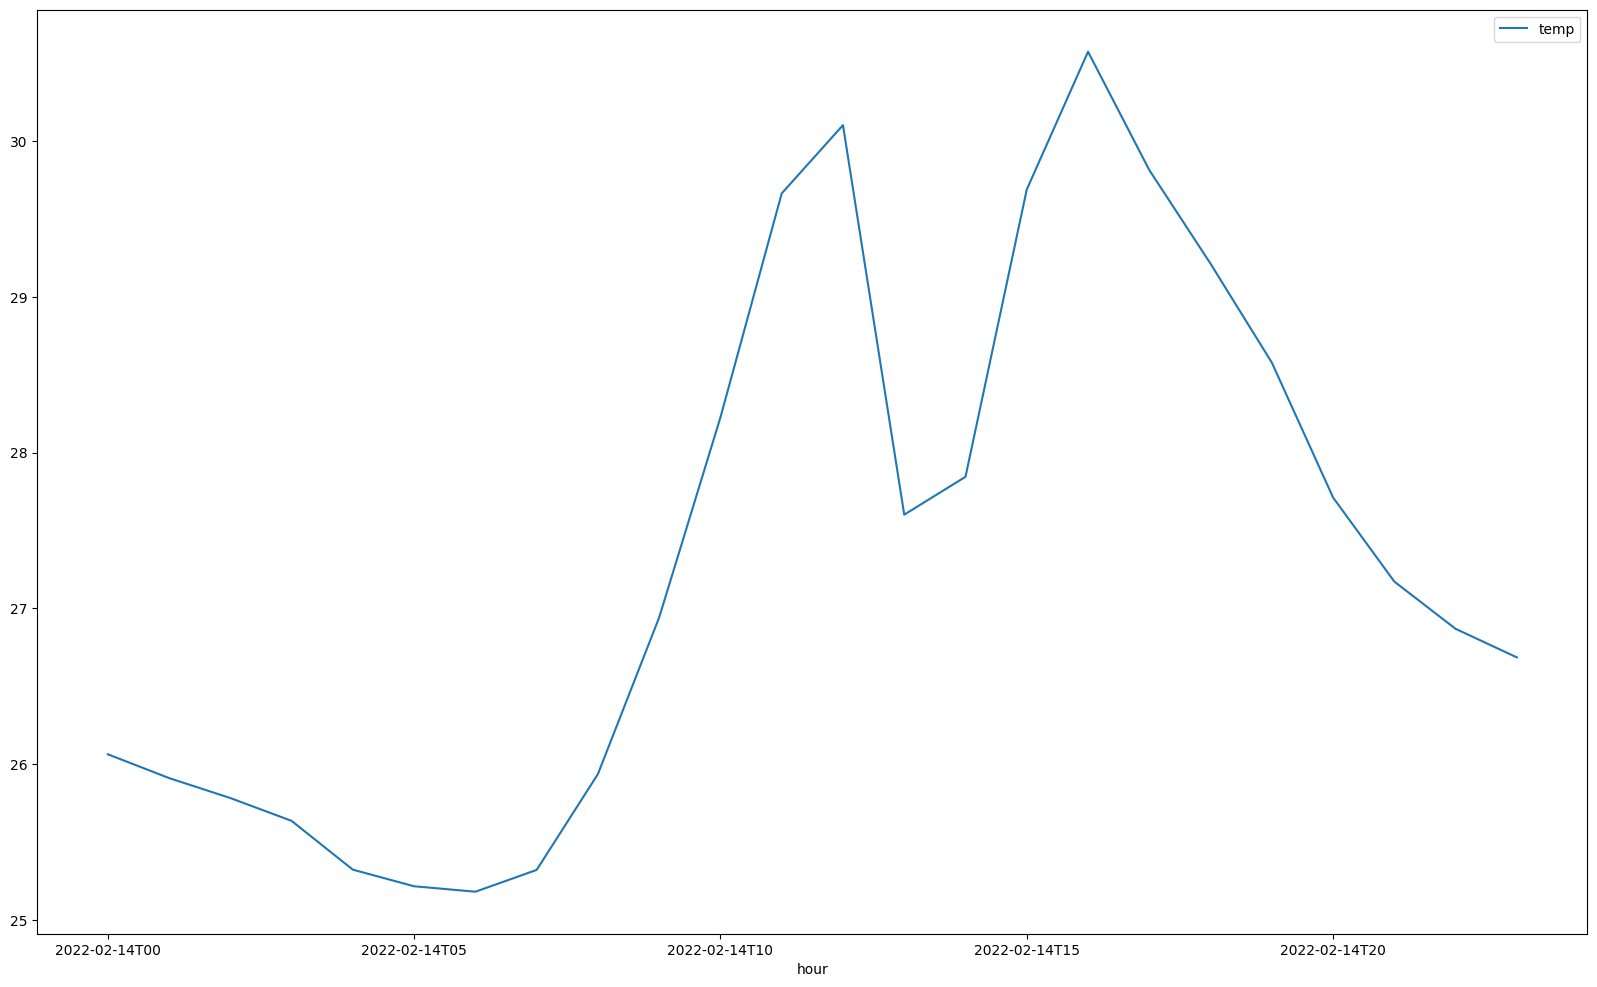

In [8]:
df.groupby(['hour']).mean().plot(figsize = (20,12))

In [51]:
from kedro.framework.context import KedroContext

In [28]:
from kedro.framework.session import KedroSession

In [47]:
from kedro.framework.context import KedroContext
from kedro.framework.session import KedroSession
from kedro.framework.startup import bootstrap_project

In [54]:
from kedro.framework.session import KedroSession

In [55]:
with KedroSession.create("project", env="env1") as session:
    context = session.load_context()
    catalog = context.catalog

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 with KedroSession.create("project", env="env1") as session:                                  │
│   2 │   context = session.load_context()                                                         │
│   3 │   catalog = context.catalog                                                                │
│   4                                                                                              │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:191 in create                                                                                 │
│                                                                                                  │
│   188 │   │   session._store.update(session_data)                                                │
│   189 │   │                                                                                      │
│   190 │   │   # we need a ConfigLoader registered in order to be able to set up logging          │
│ ❱ 191 │   │   session._setup_logging()                                                           │
│   192 │   │   return session                                                                     │
│   193 │                                                                                          │
│   194 │   def _get_logging_config(self) -> Dict[str, Any]:                                       │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:208 in _setup_logging                                                                         │
│                                                                                                  │
│   205 │   def _setup_logging(self) -> None:                                                      │
│   206 │   │   """Register logging specified in logging directory."""                             │
│   207 │   │   try:                                                                               │
│ ❱ 208 │   │   │   logging_config = self._get_logging_config()                                    │
│   209 │   │   except MissingConfigException:                                                     │
│   210 │   │   │   self._logger.debug(                                                            │
│   211 │   │   │   │   "No project logging configuration loaded; "                                │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:195 in _get_logging_config                                                                    │
│                                                                                                  │
│   192 │   │   return session                                                                     │
│   193 │                                                                                          │
│   194 │   def _get_logging_config(self) -> Dict[str, Any]:                                       │
│ ❱ 195 │   │   logging_config = self._get_config_loader()["logging"]                              │
│   196 │   │   if isinstance(logging_config, omegaconf.DictConfig):                               │
│   197 │   │   │   logging_config = OmegaConf.to_container(logging_config)                        │
│   198 │   │   # turn relative paths in logging config into 

In [53]:
with KedroSession.create() as session:
    context = session.load_context()
    catalog = context.catalog

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 with KedroSession.create() as session:                                                       │
│   2 │   context = session.load_context()                                                         │
│   3 │   catalog = context.catalog                                                                │
│   4                                                                                              │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:191 in create                                                                                 │
│                                                                                                  │
│   188 │   │   session._store.update(session_data)                                                │
│   189 │   │                                                                                      │
│   190 │   │   # we need a ConfigLoader registered in order to be able to set up logging          │
│ ❱ 191 │   │   session._setup_logging()                                                           │
│   192 │   │   return session                                                                     │
│   193 │                                                                                          │
│   194 │   def _get_logging_config(self) -> Dict[str, Any]:                                       │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:208 in _setup_logging                                                                         │
│                                                                                                  │
│   205 │   def _setup_logging(self) -> None:                                                      │
│   206 │   │   """Register logging specified in logging directory."""                             │
│   207 │   │   try:                                                                               │
│ ❱ 208 │   │   │   logging_config = self._get_logging_config()                                    │
│   209 │   │   except MissingConfigException:                                                     │
│   210 │   │   │   self._logger.debug(                                                            │
│   211 │   │   │   │   "No project logging configuration loaded; "                                │
│                                                                                                  │
│ /Users/Elena_Sidorova/opt/anaconda3/lib/python3.9/site-packages/kedro/framework/session/session. │
│ py:195 in _get_logging_config                                                                    │
│                                                                                                  │
│   192 │   │   return session                                                                     │
│   193 │                                                                                          │
│   194 │   def _get_logging_config(self) -> Dict[str, Any]:                                       │
│ ❱ 195 │   │   logging_config = self._get_config_loader()["logging"]                              │
│   196 │   │   if isinstance(logging_config, omegaconf.DictConfig):                               │
│   197 │   │   │   logging_config = OmegaConf.to_container(logging_config)                        │
│   198 │   │   # turn relative paths in logging config into 